###### Material desenvolvido para o minicurso: Introdução à solução numérica de EDP's, ministrado no ERMAC/2018 de 5 a 6 de abril de 2018 na Universidade Federal de Lavras, Lavras/MG, Brasil. Autor: [Jonas Laerte Ansoni](http://jonasansoni.blogspot.com.br/).

<img src="./figuras/logoemarc.png" width="30%">

# <center> Minicurso:<font color='blue'> Introdução à solução numérica de EDP's

### 2.6 Estabilidade e condição CFL

Na aula anterior desta série, estudamos a solução numérica das equações de convecção lineares, usando o método das diferenças finitas. Você testou o método utilizado usando diferentes opções de parâmetros? Se você fez isto, provavelmente se deparou com algum comportamento inesperado. Sua solução chegou a explodir (às vezes de maneira legal!)?

### O que aconteceu??

Para responder a essa pergunta, temos que pensar um pouco sobre o que estamos realmente implementando no código quando resolvemos a equação de convecção linear com o método forward-time / backward-space.

Em cada iteração do _loop_ de tempo, usamos os dados existentes sobre a solução no tempo $n$ para calcular a solução no próximo período de tempo, $n + 1$. Nos primeiros casos, o aumento no número de pontos de grade retornou resultados mais precisos. Houve menos erros de discretização e a onda em movimento parecia mais uma onda quadrada do que no nosso primeiro exemplo.

Cada iteração do _loop_ de tempo avança a solução por uma etapa de tempo de comprimento $\Delta t$, que tinha o valor 0,025 nos exemplos acima. Durante essa iteração, avaliamos a solução $c$ em cada um dos $x_i$ pontos da grade. Mas no último plot, algo claramente deu errado.

O que aconteceu é que durante o período de tempo $\Delta t$, a onda está viajando a uma distância maior que `dx`, e dizemos que a solução se torna *instável* nessa situação (esta afirmação pode ser provada formalmente, ver abaixo). O comprimento `dx` do espaçamento da grade é inversamente proporcional ao número total de pontos `nx`: nós utilizamos mais pontos de grade, então `dx` ficou menor. Uma vez que o `dx` ficou menor que o $u \Delta t $ (a distância percorrida pela solução numérica em um único intervalo de tempo) não é mais possível para o esquema numérico resolver a equação corretamente!

<img src="./figuras/CFLcondition2.png" width="55%">
#### Interpretação gráfica da condição CFL.

Considere a ilustração acima. O triângulo verde representa o domínio de dependência do esquema numérico. De fato, para cada etapa de tempo, a variável $c_i^{n + 1}$ depende apenas dos valores $ c_i^{n}$ e $u_{i-1}^{n}$.

Quando a distância $u\Delta t$ for menor que $\Delta x$, a linha característica traçada a partir da coordenada da grade $i, n + 1 $ permanece _entre_ os pontos $i-1, n$ e $i, n$ na grade. Em seguida, dizemos que o domínio _matemático da dependência_ da solução do EDP original está contido no _domínio de dependência_ do esquema numérico.

Pelo contrário, se $\Delta x$ for menor que $u \Delta t$, então as informações sobre a solução necessária para $c_i^{n + 1}$ não estão disponíveis no _domínio de dependência_ do esquema numérico, porque a linha característica traçada a partir da coordenada da grade $i, n + 1$ permanece _entre_ o ponto $i-1, n$ na grade.

A condição a seguir garante que o domínio de dependência da equação diferencial esteja contido no domínio _numerico_ de dependência:

\begin{equation}\sigma = \frac{u \Delta t}{\Delta x} \leq 1 
\end{equation}

Como pode ser provado formalmente, a estabilidade da solução numérica requer que o tamanho do passo "dt" seja calculado em relação ao tamanho de "dx" para satisfazer a condição acima.

O valor de $u \Delta t/ \Delta x$ é chamado de **número de Courant-Friedrichs-Lewy** (número de CFL), frequentemente denotado por $\sigma$. O valor $\sigma_{\text{max}}$ que garantirá a estabilidade depende da discretização usada; Para o esquema forward-time/backward-space, a condição para a estabilidade é $\sigma <1$.

Em uma nova versão do nosso código, usaremos o número CFL para calcular o passo de tempo apropriado `dt` dependendo do tamanho de` dx`.

#### Existe um teorema afirmando que o método será estável se $0 < \sigma \leq 1$ e instável se $\sigma > 1$. (Ames, 1992).  Difusão numérica.

<div class="alert alert-success" role="alert">
<h4> Note que esta condição estabelece que a velocidade numérica tem que ser maior ou igual à velocidade de advecção $u$.</h4>
</div>

In [1]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def linearconv(nx):
    """Solve the linear convection equation.
    
    Solves the equation d_t u + c d_x u = 0 where 
    * the wavespeed c is set to 1
    * the domain is x \in [0, 2]
    * 20 timesteps are taken, with \Delta t computed using the CFL 0.5
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    None : none
    """
    dx = 2/(nx-1)
    nt = 20    
    c = 1
    sigma = .5
    x = numpy.linspace(0,2,nx)
    
    dt = sigma*dx

    u = numpy.ones(nx) 
    lbound = numpy.where(x >= 0.5)
    ubound = numpy.where(x <= 1)
    u[numpy.intersect1d(lbound, ubound)]=2 

    un = numpy.ones(nx)

    for n in range(nt):  
        un = u.copy() 
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = 1.0
        
    pyplot.plot(x, u, color='#003366', ls='--', lw=3)
    pyplot.ylim(0,2.5);

Agora, não importa quantos pontos usamos para a grade espacial: a solução será sempre estável!

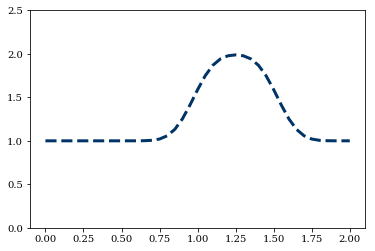

In [3]:
linearconv(41) #41, 101, 121

In [4]:
from IPython.core.display import HTML
css_file = '../styles/custom.css'
HTML(open(css_file, "r").read())